In [1]:
path = '../phd-model-process/'
import numpy as np
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.patches import Ellipse, Rectangle

In [2]:
# def facet_scatter(x, y, c, **kwargs):
#     """Draw scatterplot with point colors from a faceted DataFrame columns."""
#     kwargs.pop("color")
#     plt.scatter(x, y, c=c, **kwargs)    

Want to constrain mobility in soils by outlet fit. 

Does the **variable model** allow us to see the constraint effects (on Kd and DT50), when constrained by the outlet? 

In [50]:
gen = "Gen6"
df6 = get_data(gen=gen)
# # df3 = get_data(gen="Gen3")
# df4 = get_data(gen="Gen4")
# # df4 = get_data(gen="Gen4")


In [51]:
df6["Gen"] = gen
# df3["Gen"] = "Gen3"
# df4["Gen"] = "Gen4"
df = pd.concat([df6, 
#                 df3, 
#                 df4
               ])

In [52]:
print(len(df), 
#       len(df4)
     )

(4848,)


In [53]:
# Index names
df['Name'] = df['Gen'] + "/" + df.index
df = df.set_index('Name')

In [54]:
# list(df6)
# 'LHS_e1var7/1/' in df.index

In [55]:
df['K_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']
# Combined outlet and transects KGE Concentrations and d13C
df['KGE-SM'] = (df.loc[:, 'KGE-CONC_out'] + df.loc[:, 'KGE-CONC-tra'])/2.0  
df['KGE-d13C'] = (df.loc[:, 'KGE-d13C_out'] + df.loc[:, 'KGE-d13C-tra'])/2.0

cst = 0.5
# cst = -2
df['Constraint'] = df.apply(WithIsoKGE, args=(cst,), axis=1)

In [56]:
print("Maximum Conc.")
print(df['KGE-CONC-tra'].max(), df['KGE-CONC_out'].max(), df['KGE-SM'].max()) 
print("Maximum d13C")
print(df['KGE-d13C-tra'].max(), df['KGE-d13C_out'].max(), df['KGE-d13C'].max()) 

Maximum Conc.
(0.8071323424319412, 0.41124351408871074, 0.5823985899254127)
Maximum d13C
(0.8767684725788549, 0.5637517755122933, 0.7044689565243463)


In [57]:
dfs = df[['Model', 'Gen',
          'K_d', 'dt_50_ref', 'k_oc', 'f_oc', 'beta_moisture',
          'KGE-CONC-tra' , 
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-LDS_out',
          'KGE-d13C-tra', 'KGE-d13C_out',
          'KGE-SM', 'KGE-d13C', 'Constraint'
         ]]

In [58]:
dfs.tail()

,Model,Gen,K_d,dt_50_ref,k_oc,f_oc,beta_moisture,KGE-CONC-tra,KGE-Q_out,KGE-CONC_out,KGE-LDS_out,KGE-d13C-tra,KGE-d13C_out,KGE-SM,KGE-d13C,Constraint
Name,,,,,,,,,,,,,,,,
Gen6/LHS_sc1var43/95/,var,Gen6,8.999170,44.380661,340.363686,0.026440,0.511950,0.586743,0.681646,0.204830,-0.818082,0.368254,-1.710033,0.395786,-0.670889,NC
Gen6/LHS_sc1var43/96/,var,Gen6,20.717008,5.628008,461.752015,0.044866,0.292307,-0.050819,0.465962,-0.453113,-0.382132,-3.456700,-7.954195,-0.251966,-5.705447,NC
Gen6/LHS_sc1var43/97/,var,Gen6,44.592821,35.950486,1739.951452,0.025629,0.608215,0.530821,0.738097,-1.028791,-9.055224,0.351001,-2.718386,-0.248985,-1.183692,NC
Gen6/LHS_sc1var43/98/,var,Gen6,40.698861,29.267501,969.576336,0.041976,0.543638,0.626810,0.644273,-0.361576,0.256482,0.185668,-0.026579,0.132617,0.079544,NC
Gen6/LHS_sc1var43/99/,var,Gen6,65.223169,46.318948,1381.841321,0.047200,0.882949,-0.044987,0.181183,-0.622300,-11.978583,0.276364,0.248338,-0.333644,0.262351,NC


Filter for good concentrations

In [59]:
# # Filter
# ff = dfs.loc[(dfs['KGE-SM'] > 0.3)] # Try 25 with more data points
# ff_c = ff.loc[(ff['KGE-d13C'] > 0.3)]
# print(len(dfs), len(ff), len(ff_c))

# fix_num = len(dfs.loc[dfs['Model']== 'fix'])
# var_num = len(dfs.loc[dfs['Model']== 'var'])

# fix_passed = len(ff.loc[ff['Model']== 'fix'])
# var_passed = len(ff.loc[ff['Model']== 'var'])

# f_fix = round(float(fix_passed)/fix_num, 3)
# f_var = round(float(var_passed)/var_num, 3)
# print(fix_num, var_num)
# print(f_fix, f_var)
# print(f_fix*fix_num, f_var*var_num)

In [60]:
# print("Maximum Conc.")
# print(ff['KGE-CONC-tra'].max(), ff['KGE-CONC_out'].max(), ff['KGE-SM'].max()) 
# print("Maximum d13C")
# print(ff['KGE-d13C-tra'].max(), ff['KGE-d13C_out'].max(), ff['KGE-d13C'].max()) 

In [61]:
# Filter
# ff = dfs.loc[(dfs['KGE-SM'] > 0.40)] # Try 25 with more data points
# ff_c = dfs.loc[(dfs['KGE-SM'] > 0.40) &(dfs['KGE-d13C'] > 0.4)]


print(len(dfs), len(ff), len(ff_c))
ff.tail()

(4848, 35, 178)


,Model,Gen,K_d,dt_50_ref,k_oc,f_oc,beta_moisture,KGE-CONC-tra,KGE-Q_out,KGE-CONC_out,KGE-LDS_out,KGE-d13C-tra,KGE-d13C_out,KGE-SM,KGE-d13C,Constraint
Name,,,,,,,,,,,,,,,,
Gen8/LHS_s2var53/19/,var,Gen8,38.133023,34.169238,1777.942268,0.021448,0.015825,0.788086,0.583830,0.034805,-4.324605,0.775290,-1.825338,0.411446,-0.525024,WC
Gen8/LHS_s2var53/23/,var,Gen8,18.773750,39.353813,618.180188,0.030369,0.479896,0.787757,0.645789,0.224732,-0.393998,0.481607,-2.176114,0.506244,-0.847253,WC
Gen8/LHS_s2var53/3/,var,Gen8,8.707638,33.463101,810.113394,0.010749,0.134568,0.774181,0.397135,0.322334,-2.186411,0.047271,-2.341103,0.548257,-1.146916,WC
Gen8/LHS_s2var53/40/,var,Gen8,37.251191,26.446971,1533.735372,0.024288,0.568106,0.598516,0.261576,0.307849,-0.395671,-0.175862,-2.353675,0.453183,-1.264769,WC
Gen8/LHS_s2var53/45/,var,Gen8,20.927509,35.359307,446.907304,0.046827,0.170116,0.789699,0.183117,0.166394,-1.059184,0.815050,-1.638616,0.478046,-0.411783,WC


In [62]:
beta_moi = ff.loc[(ff['Model'] == 'var')]['beta_moisture'].mean()

In [63]:
fix = ff.index[(ff['Model'] == 'fix')].tolist() #[0]
var = ff.index[(ff['Model'] == 'var')].tolist() #[0]

nc_fix = ff.index[(ff['Constraint'] == 'NC') & (ff['Model'] == 'fix')].tolist() #[0]
nc_var = ff.index[(ff['Constraint'] == 'NC') & (ff['Model'] == 'var')].tolist() #[0]

wc_fix = ff.index[(ff['Constraint'] == 'WC') & (ff['Model'] == 'fix')].tolist() #[0]
wc_var = ff.index[(ff['Constraint'] == 'WC') & (ff['Model'] == 'var')].tolist() #[0]
print(len(nc_fix), len(nc_var), 
      len(wc_fix), len(wc_var))

(0, 2, 7, 26)


In [64]:
def get_sets(name_list, filename, vname):
    sets = []
    for i in range(len(name_list)):
        # Define variable name
        series_name = vname + name_list[i][8:] # Variable + set's name
        # Get sim TSS
        sim = pd.read_table(path + name_list[i] + filename, 
                       skiprows=4, delim_whitespace=True,
                                    names=['Jdays', series_name],
                                    header=None
                      )
        sim = sim[['Jdays', series_name]]
        sim = sim[0:121]
        sets.append(sim)
    df = reduce(lambda left, right: pd.merge(left,right,on='Jdays'), sets)
    return df

In [66]:
deg_fix = get_sets(fix, "resW_z0_DT50.tss", "DT50")
deg_var = get_sets(var, "resW_z0_DT50.tss", "DT50")

tmp_fix = get_sets(fix, "resW_z0_Temp.tss", "Temp")
tmp_var = get_sets(var, "resW_z0_Temp.tss", "Temp")

moi_fix = get_sets(fix, "resW_z0_thetaPropSat.tss", "Theta")
moi_var = get_sets(var, "resW_z0_thetaPropSat.tss", "Theta")

In [67]:
nc_deg_fix = get_sets(nc_fix, "resW_z0_DT50.tss", "DT50")
nc_deg_var = get_sets(nc_var, "resW_z0_DT50.tss", "DT50")

# wc_deg_fix = get_sets(wc_fix, "resW_z0_DT50.tss", "DT50")
# wc_deg_var = get_sets(wc_var, "resW_z0_DT50.tss", "DT50")

nc_tmp_fix = get_sets(nc_fix, "resW_z0_Temp.tss", "Temp")
nc_tmp_var = get_sets(nc_var, "resW_z0_Temp.tss", "Temp")

# wc_tmp_fix = get_sets(wc_fix, "resW_z0_Temp.tss", "Temp")
# wc_tmp_var = get_sets(wc_var, "resW_z0_Temp.tss", "Temp")

nc_moi_fix = get_sets(nc_fix, "resW_z0_thetaPropSat.tss", "Theta")
nc_moi_var = get_sets(nc_var, "resW_z0_thetaPropSat.tss", "Theta")

# wc_moi_fix = get_sets(wc_fix, "resW_z0_thetaPropSat.tss", "Theta")
# wc_moi_var = get_sets(wc_var, "resW_z0_thetaPropSat.tss", "Theta")

TypeError: reduce() of empty sequence with no initial value

In [31]:
def get_stats_df(df):
    n = len(np.array(df.iloc[0,1:]))
    df['mean'] = df.iloc[:,1:n+1].mean(axis=1)
    df['min'] = df.iloc[:,1:n+1].min(axis=1)
    df['max'] = df.iloc[:,1:n+1].max(axis=1)
    df['sem'] = df.iloc[:,1:n+1].sem(axis=1)
    df['sd'] = df.iloc[:,1:n+1].std(axis=1)
    df['high'] = df['mean'] + 2.*df['sd']
    df['low'] = df['mean'] - 2.*df['sd']
#     df['high'] = df.apply(get_ci, args=(n, 0.95, True), axis=1)
#     df['low'] = df.apply(get_ci, args=(n, 0.95, False), axis=1)
    df['low'] = df.apply(check_negative, axis=1)
    return df[['Jdays', 'mean', 'sd', 'high', 'low', 'max', 'min']]

In [21]:
stat_fix = [get_stats_df(deg_fix), get_stats_df(tmp_fix), get_stats_df(moi_fix)]
stat_var = [get_stats_df(deg_var), get_stats_df(tmp_var), get_stats_df(moi_var)]

In [22]:
# stat_var[1].tail()
# stat_fix[1].head()

In [23]:
nc_stat_fix = [get_stats_df(nc_deg_fix), get_stats_df(nc_tmp_fix), get_stats_df(nc_moi_fix)]
nc_stat_var = [get_stats_df(nc_deg_var), get_stats_df(nc_tmp_var), get_stats_df(nc_moi_var)]

# wc_stat_fix = [get_stats_df(nc_deg_fix), get_stats_df(nc_tmp_fix), get_stats_df(nc_moi_fix)]
# wc_stat_var = [get_stats_df(nc_deg_var), get_stats_df(nc_tmp_var), get_stats_df(nc_moi_var)]

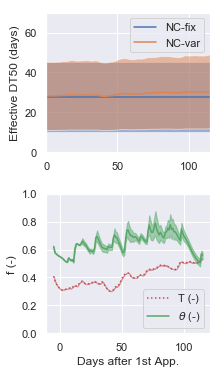

In [26]:
# sns.set(rc={'figure.figsize':(11.7, 8.27)})
# ES&T max width, 1 column = 3.25in, 2-col = 7in 
sns.set_context("paper")
sns.set(rc={'figure.figsize':(3.25, 5.27)}) # Width, height, inches

fig, axes = plt.subplots(2, 1, sharex=False, sharey=False)



ax1 = axes[0]
ax2 = axes[1]
# ax3 = axes[2]

time = np.array(nc_stat_fix[0]['Jdays']-171)

# ALL
deg_mean_fix = np.array(stat_fix[0]['mean'])
deg_high_fix = np.array(stat_fix[0]['high'])
deg_low_fix = np.array(stat_fix[0]['low'])

deg_mean_var = np.array(stat_var[0]['mean'])
deg_high_var = np.array(stat_var[0]['high'])
deg_low_var = np.array(stat_var[0]['low'])

tmp_mean_fix = np.array(stat_fix[1]['mean'])
tmp_high_fix = np.array(stat_fix[1]['high'])
tmp_low_fix = np.array(stat_fix[1]['low'])

tmp_mean_var = np.array(stat_var[1]['mean'])
tmp_high_var = np.array(stat_var[1]['high'])
tmp_low_var = np.array(stat_var[1]['low'])

moi_mean_fix = np.array(stat_fix[2]['mean'])
moi_high_fix = np.array(stat_fix[2]['high'])
moi_low_fix = np.array(stat_fix[2]['low'])

moi_mean_var = np.array(stat_var[2]['mean'])
moi_high_var = np.array(stat_var[2]['high'])
moi_low_var = np.array(stat_var[2]['low'])


# NC
nc_deg_mean_fix = np.array(nc_stat_fix[0]['mean'])
nc_deg_high_fix = np.array(nc_stat_fix[0]['high'])
nc_deg_low_fix = np.array(nc_stat_fix[0]['low'])

nc_deg_mean_var = np.array(nc_stat_var[0]['mean'])
nc_deg_high_var = np.array(nc_stat_var[0]['high'])
nc_deg_low_var = np.array(nc_stat_var[0]['low'])

nc_tmp_mean_fix = np.array(nc_stat_fix[1]['mean'])
nc_tmp_high_fix = np.array(nc_stat_fix[1]['high'])
nc_tmp_low_fix = np.array(nc_stat_fix[1]['low'])

nc_tmp_mean_var = np.array(nc_stat_var[1]['mean'])
nc_tmp_high_var = np.array(nc_stat_var[1]['high'])
nc_tmp_low_var = np.array(nc_stat_var[1]['low'])

nc_moi_mean_fix = np.array(nc_stat_fix[2]['mean'])
nc_moi_high_fix = np.array(nc_stat_fix[2]['high'])
nc_moi_low_fix = np.array(nc_stat_fix[2]['low'])

nc_moi_mean_var = np.array(nc_stat_var[2]['mean'])
nc_moi_high_var = np.array(nc_stat_var[2]['high'])
nc_moi_low_var = np.array(nc_stat_var[2]['low'])


# WC
# wc_deg_mean_fix = np.array(wc_stat_fix[0]['mean'])
# wc_deg_high_fix = np.array(wc_stat_fix[0]['high'])
# wc_deg_low_fix = np.array(wc_stat_fix[0]['low'])

# wc_deg_mean_var = np.array(wc_stat_var[0]['mean'])
# wc_deg_high_var = np.array(wc_stat_var[0]['high'])
# wc_deg_low_var = np.array(wc_stat_var[0]['low'])


# wc_tmp_mean_fix = np.array(wc_stat_fix[1]['mean'])
# wc_tmp_high_fix = np.array(wc_stat_fix[1]['high'])
# wc_tmp_low_fix = np.array(wc_stat_fix[1]['low'])

# wc_tmp_mean_var = np.array(wc_stat_var[1]['mean'])
# wc_tmp_high_var = np.array(wc_stat_var[1]['high'])
# wc_tmp_low_var = np.array(wc_stat_var[1]['low'])

# wc_moi_mean_fix = np.array(wc_stat_fix[2]['mean'])
# wc_moi_high_fix = np.array(wc_stat_fix[2]['high'])
# wc_moi_low_fix = np.array(wc_stat_fix[2]['low'])

# wc_moi_mean_var = np.array(wc_stat_var[2]['mean'])
# wc_moi_high_var = np.array(wc_stat_var[2]['high'])
# wc_moi_low_var = np.array(wc_stat_var[2]['low'])

# NC (LEFT)
ax1.plot(time, nc_deg_mean_fix, label='NC-fix') # c= "red", marker='.', linestyle=':'
ax1.legend(loc="upper right")
ax1.fill_between(time, nc_deg_high_fix, nc_deg_low_fix, alpha=0.5)

ax1.plot(time, nc_deg_mean_var, label='NC-var' ) #, color="C0", linestyle=':') # c= "red", marker='.'
ax1.legend(loc="upper right")
ax1.fill_between(time, nc_deg_high_var, nc_deg_low_var, alpha=0.5)

# NC (RIGHT)
ax2.plot(time, nc_tmp_mean_var, label='T (-)', color="C3", linestyle=':') # c= "red", marker='.'
ax2.fill_between(time, nc_tmp_high_var, nc_tmp_low_var, color="C3", alpha=0.5)
# # ax2.legend(loc="lower right")

ax2.plot(time, nc_moi_mean_var, label='$\\theta$ (-)', color="C2", linestyle='-') # c= "red", marker='.'
ax2.legend(loc="lower right")
ax2.fill_between(time, nc_moi_high_var, nc_moi_low_var, color="C2", alpha=0.5)


# WC
# ax1.plot(time, deg_mean_fix, label='Fix DT50') # c= "red", marker='.', linestyle=':'
# ax1.fill_between(time, deg_high_fix, deg_low_fix, alpha=0.5)

# ax1.plot(time, deg_mean_var, label='Var DT50' ) #, color="C0", linestyle=':') # c= "red", marker='.'
# ax1.legend(loc="lower right")
# ax1.fill_between(time, deg_high_var, deg_low_var, alpha=0.5)


# ax2.plot(time, wc_tmp_mean_fix, label='T-WC-fix') # c= "red", marker='.', linestyle=':'
# ax2.legend(loc="upper left")
# ax2.fill_between(time, wc_tmp_high_fix, wc_tmp_low_fix, alpha=0.5)

# ALL
# ax2.plot(time, tmp_mean_var, label='T (-)', color="C3", linestyle=':') # c= "red", marker='.'
# ax2.fill_between(time, tmp_high_var, tmp_low_var, color="C3", alpha=0.5)
# # ax2.legend(loc="lower right")

# ax2.plot(time, moi_mean_var, label='$\\theta$ (-)', color="C2", linestyle='-') # c= "red", marker='.'
# ax2.legend(loc="lower right")
# ax2.fill_between(time, moi_high_var, moi_low_var, color="C2", alpha=0.5)

ax2.set_ylim(0, 1)
ax1.set_ylim(0, 70)
ax1.set_xlim(0, 115)

ax1.set_ylabel("Effective DT50 (days)")
ax2.set_ylabel("f (-)")
ax2.set_xlabel("Days after 1st App.")

plt.subplots_adjust(left=.2, bottom=None, right=None, top=.97,
                wspace=None, hspace=.3)

# fig.savefig("Fig3_EffDT50.pdf")


In [27]:
tmp_cor = np.corrcoef(deg_mean_var, tmp_mean_var)[1, 0]
tmp_cor

0.9984601945618876

In [28]:
moi_cor = np.corrcoef(deg_mean_var, moi_mean_var)[1, 0]
moi_cor

0.3835000114349868

In [29]:
(deg_mean_var - deg_mean_fix).max()

2.5006578568548825

In [30]:
# Temp - Coefficient of variation
deg_mean_var

array([30.01262718, 29.64341544, 29.39404027, 29.19342617, 29.07980738,
       28.94171174, 28.8557453 , 28.82449732, 28.83919094, 28.86097886,
       28.86184564, 28.88333154, 28.88970973, 28.9342151 , 28.8868557 ,
       28.94963121, 29.04709799, 29.11594765, 29.07652752, 29.05917852,
       29.18853591, 29.32619799, 29.40113389, 29.45973423, 29.41448859,
       29.29943993, 29.23957081, 29.23798523, 29.24499329, 29.28828624,
       29.3022057 , 29.32796611, 29.38286309, 29.41503255, 29.36629966,
       29.30471611, 29.24832685, 29.24182383, 29.26777785, 29.37788523,
       29.33082047, 29.14869597, 28.99956879, 28.85877919, 28.74661611,
       28.66327282, 28.6420349 , 28.64435403, 28.70557987, 28.85229027,
       28.94225738, 28.95689396, 29.02294933, 29.17204396, 29.35606879,
       29.56118356, 29.74886309, 29.88667047, 29.96087148, 30.02692416,
       30.055     , 30.02763523, 29.86293993, 29.76481913, 29.71148389,
       29.71484799, 29.69142383, 29.70726074, 29.81977315, 29.91

In [31]:
len(tmp_mean_var[60:])

61

In [32]:
((tmp_mean_var).var())**0.5/(tmp_mean_var).mean()

0.1694989626564635

In [33]:
# First half
((tmp_mean_var[0:60]).var())**0.5/(tmp_mean_var[60:]).mean()

0.06482901464736168

In [34]:
# Second half
((tmp_mean_var[60:]).var())**0.5/(tmp_mean_var[60:]).mean()

0.08143472392176442

In [35]:
# Moisture 

In [37]:
((moi_mean_var).var())**0.5/(moi_mean_var).mean()

0.11275502878883938

In [38]:
# First half
((moi_mean_var[0:60]).var())**0.5/(moi_mean_var[0:60]).mean()

0.08955987049614084

In [39]:
# Second half
((moi_mean_var[60:]).var())**0.5/(moi_mean_var[60:]).mean()

0.1020827995029022

## Heatmap

In [57]:
moi_mean_fix.mean()
tmp_mean_fix.mean()

0.40961291028823404

In [91]:
# sns.set()

theta = np.arange(0.05,0.65, 0.05)
theta
temp = np.arange(5, 65, 5)
temp

dt50_ref = deg_mean_fix.mean()
theta_ref = 0.2
temp_ref = 20.
beta2 = 0.50

def theta_factor_a(theta_ref, theta_obs, beta2):
    return (theta_obs/theta_ref)**beta2

def temp_factor(t_obs, t_ref):
    tk_obs = t_obs + 273.15
    tk_ref = t_ref + 273.15
    E_a = 23.91  # Kj/mol
    R = 0.008314  # mol Kelvin/ Kj
    return np.exp((E_a/R)*(1/tk_obs - 1/tk_ref))

In [92]:
x = []
y = []
z = []
for i in theta:
    for j in temp:
        x.append(round(i,3))
        y.append(int(j))
        z.append(round(dt50_ref*theta_factor_a(theta_ref, i, beta2)*temp_factor(j, temp_ref),0))


In [93]:
d = {'Moisture': x, 'Temp': y, 'DT50':z}
df = pd.DataFrame(data=d)
df1 = df.pivot("Moisture", "Temp", "DT50")

In [94]:
df1

Temp,5,10,15,20,25,30,35,40,45,50,55,60
Moisture,,,,,,,,,,,,
0.05,24.0,20.0,17.0,14.0,12.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0
0.10,34.0,29.0,24.0,20.0,17.0,15.0,13.0,11.0,9.0,8.0,7.0,6.0
0.15,42.0,35.0,29.0,25.0,21.0,18.0,15.0,13.0,11.0,10.0,9.0,8.0
0.20,49.0,41.0,34.0,29.0,24.0,21.0,18.0,15.0,13.0,12.0,10.0,9.0
0.25,54.0,45.0,38.0,32.0,27.0,23.0,20.0,17.0,15.0,13.0,11.0,10.0
0.30,60.0,50.0,42.0,35.0,30.0,25.0,22.0,19.0,16.0,14.0,12.0,11.0
0.35,64.0,54.0,45.0,38.0,32.0,27.0,24.0,20.0,18.0,15.0,13.0,12.0
0.40,69.0,57.0,48.0,41.0,34.0,29.0,25.0,22.0,19.0,16.0,14.0,12.0
0.45,73.0,61.0,51.0,43.0,36.0,31.0,27.0,23.0,20.0,17.0,15.0,13.0


In [95]:
iy = (0.4/.6)*12*0.93
ix = (25/60.)*12.*0.90

moi_mean_var[0:5]*.4
tmp_mean_var[0:5]*27.

array([11.0267508 , 10.18168188,  9.62206393,  9.170388  ,  8.93174488])

In [96]:
y_adj = 0.93
x_adj = 0.90

max_x = 60.
max_y = .60
max_moi = 0.50

moi = ((moi_mean_var*max_moi)/max_y)*12*y_adj
tmp = ((tmp_mean_var*27.)/max_x)*12*x_adj

moi_h = ((moi_high_var*max_moi)/max_y)*12*y_adj
tmp_h = ((tmp_high_var*27.)/max_x)*12*x_adj

moi_l = ((moi_low_var*max_moi)/max_y)*12*y_adj
tmp_l = ((tmp_low_var*27.)/max_x)*12*x_adj

In [97]:
sns.set_context("paper")
sns.set(rc={'figure.figsize':(7, 4.)}) # Width, height, inches

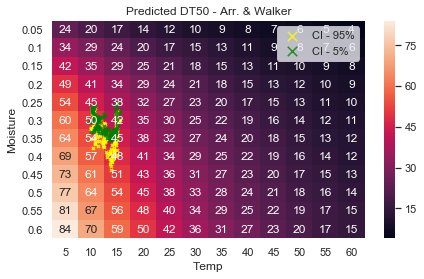

In [98]:
ax = plt.axes()
ax.set_title('Predicted DT50 - Arr. & Walker')
heat1 = sns.heatmap(df1, ax=ax, annot=True)
ax.scatter(tmp_h, moi_h, c="yellow", marker='x', label="CI - 95%", s=10, alpha=0.8)
# ax.scatter(tmp, moi, c= "green", marker='x', label="CI - 50%", s=10, alpha=0.8)
ax.scatter(tmp_l, moi_l, c="green", marker='x', label="CI - 5%", s=10, alpha=0.8)
ax.legend(markerscale = 3)
plt.show()

In [99]:
ax.get_ylim()

(12.0, 0.0)

In [100]:
mean_tmp = (tmp_mean_fix*27.).mean()
mean_tmp

11.059548577782321

In [101]:
mean_moi = (moi_mean_fix*.5).mean()
mean_moi

0.32287701953683967

In [102]:
dt50_ref*theta_factor_a(theta_ref, mean_moi, beta2)*temp_factor(mean_tmp, temp_ref)

49.553045983684115

Text(0.5,12.5,'Days after 1st App.')

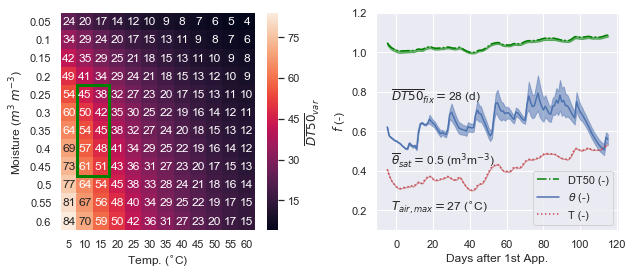

In [103]:
# sns.set(rc={'figure.figsize':(11.7, 8.27)})
# ES&T max width, 1 column = 3.25in, 2-col = 7in 
sns.set_context("paper")
# sns.set(rc={'figure.figsize':(9.25, 5.27)}) # Width, height, inches
sns.set(rc={'figure.figsize':(10.0, 4.)}) # Width, height, inches

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)

ax1 = axes[0]
ax2 = axes[1]
# ax3 = axes[2]

time = np.array(nc_stat_fix[0]['Jdays']-171)

# ALL
deg_mean_fix = np.array(stat_fix[0]['mean'])
deg_high_fix = np.array(stat_fix[0]['high'])
deg_low_fix = np.array(stat_fix[0]['low'])

deg_mean_var = np.array(stat_var[0]['mean'])
deg_high_var = np.array(stat_var[0]['high'])
deg_low_var = np.array(stat_var[0]['low'])

tmp_mean_fix = np.array(stat_fix[1]['mean'])
tmp_high_fix = np.array(stat_fix[1]['high'])
tmp_low_fix = np.array(stat_fix[1]['low'])

tmp_mean_var = np.array(stat_var[1]['mean'])
tmp_high_var = np.array(stat_var[1]['high'])
tmp_low_var = np.array(stat_var[1]['low'])

moi_mean_fix = np.array(stat_fix[2]['mean'])
moi_high_fix = np.array(stat_fix[2]['high'])
moi_low_fix = np.array(stat_fix[2]['low'])

moi_mean_var = np.array(stat_var[2]['mean'])
moi_high_var = np.array(stat_var[2]['high'])
moi_low_var = np.array(stat_var[2]['low'])

heat1 = sns.heatmap(df1, ax=ax1, annot=True, 
                    cbar_kws={'label': '$\overline{DT50}$$_{var}$'}
                   )

# ax1.scatter(tmp_h, moi_h, c="yellow", marker='x', label="CI - 95%", s=10, alpha=0.8)
# ax1.scatter(tmp_l, moi_l, c="C0", marker='x', label="CI - 5%", s=10, alpha=0.8)

# ax1.scatter(tmp, moi, c= "green", marker='x', label="CI - 50%", s=10, alpha=0.8)
# ax1.legend(markerscale = 3)

ax2.plot(time, deg_mean_var/deg_mean_fix, label='DT50 (-)', color="green", linestyle='-.') # c= "red", marker='.'
ax2.fill_between(time, deg_low_var/deg_low_fix, deg_high_var/deg_high_fix, color="green", alpha=0.5)

ax2.plot(time, moi_mean_var, label='$\\theta$ (-)', color="C0", linestyle='-') # c= "red", marker='.'
ax2.fill_between(time, moi_high_var, moi_low_var, color="C0", alpha=0.5)

ax2.plot(time, tmp_mean_var, label='T (-)', color="C3", linestyle=':') # c= "red", marker='.'
ax2.fill_between(time, tmp_high_var, tmp_low_var, color="C3", alpha=0.5)

ax2.legend(loc="lower right")
ax2.set_ylim(0.1, 1.2)
# ax1.set_ylim(0, 70)
# ax1.set_xlim(0, 115)

# ax1.set_ylabel("Effective DT50 (days)")
# ax2.set_ylabel("f (-)")
# ax2.set_xlabel("Days after 1st App.")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=None)

rec1 = Rectangle((1, 4.), 2., 5, edgecolor="green", linestyle="-", linewidth=3., fill=False, alpha=1)
ax1.add_patch(rec1)
axes[1].annotate('$\overline{DT50}$$_{fix}=$'+str(int(deg_mean_fix.mean()))+ ' (d)', xy=(-3, 0.75), # 1.2 
                 xycoords='data')

axes[1].annotate('$\overline{\\theta}$$_{sat}=$'+str(0.5)+' (m$^{3}$m$^{-3}$)', xy=(-3, .43), # 0.75
                 xycoords='data')

axes[1].annotate('$T_{air, max}=$'+str(27)+' ($^{\circ}$C)', xy=(-3, .2), # 0.75
                 xycoords='data')

axes[0].set_ylabel("Moisture ($m^{3}$ $m^{-3}$)")
axes[0].set_xlabel("Temp. ($^{\circ}$C)")

axes[1].set_ylabel("$f$ (-)")
axes[1].set_xlabel("Days after 1st App.")
# fig.savefig("Fig3_EffDT50.pdf")

In [104]:
34/31.

1.096774193548387

In [105]:
deg_mean_var.mean()

29.828757085806203

In [106]:
deg_high_var.mean()

47.49716755085982

In [107]:
deg_low_var.mean()/2

6.080173310376293

In [471]:
32-26

6

In [472]:
32-12

20

In [476]:
deg_low_fix.mean()

14.017495177493432

In [478]:
deg_high_fix.mean()

48.01287503527252

In [479]:
deg_mean_fix.mean()

31.015185106382987